# Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# give link of the kaggle token

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

# download dataset into collab

In [3]:
!kaggle datasets download -d benoit72/uk-accidents-10-years-history-with-many-variables

uk-accidents-10-years-history-with-many-variables.zip: Skipping, found more recently modified local copy (use --force to force download)


# unzip the dataset

In [4]:
!unzip uk-accidents-10-years-history-with-many-variables.zip

Archive:  uk-accidents-10-years-history-with-many-variables.zip
replace Accidents0514.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# import required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import Normalizer, LabelEncoder

# given csv file has many features and we predict if the police arrived at scene of accident or not

In [90]:
ds = pd.read_csv('Accidents0514.csv')
ds.head()

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


# shuffle the dataset so we dont have same examples repeating

In [91]:
ds=ds.sample(frac=1)
ds.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

# we drop the following columns as they either serve no purpose or have a little effect on the police reacting to the situation

In [92]:
ds = ds.drop(['Accident_Index', 'Date', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number','2nd_Road_Class',
       '2nd_Road_Number', 'LSOA_of_Accident_Location'], axis=1)

# chek for any object data types, if exist convert them to numericals

In [93]:
cc= [c for c in ds.columns if ds[c].dtype=='O']
cc

[]

# Check for values in target label

In [94]:
ds['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

 1    1326279
 2     310881
 3       3167
-1        270
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

# drop 3 and -1 as they have very less data and will be insignificant

In [95]:
ds = ds[ds.Did_Police_Officer_Attend_Scene_of_Accident!= 3]
ds = ds[ds.Did_Police_Officer_Attend_Scene_of_Accident!= -1]
ds=ds.dropna()

# here 1 means police didn't arrive 2 means they arrived

In [96]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# split data into x and y, features and labels

In [97]:
X, y  = ds.drop('Did_Police_Officer_Attend_Scene_of_Accident', axis=1), ds['Did_Police_Officer_Attend_Scene_of_Accident']
print(X)
print(y)

         Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
270161                445540.0                532270.0  -1.295155  54.683447   
738766                275130.0                656210.0  -3.992705  55.783070   
870937                531820.0                105590.0  -0.129387  50.834771   
1524373               384690.0                434278.0  -2.233960  53.804568   
128548                544310.0                210110.0   0.090113  51.771020   
...                        ...                     ...        ...        ...   
48683                 359430.0                388260.0  -2.611500  53.389600   
58465                 427830.0                512570.0  -1.571701  54.507695   
1230044               517480.0                180660.0  -0.308417  51.512608   
440582                424170.0                497090.0  -1.629483  54.368763   
1467508               531998.0                104128.0  -0.127387  50.821590   

         Police_Force  Accident_Severit

# undersample the data

In [103]:
usmp = RandomUnderSampler()
X , y = usmp.fit_resample(X, y)
y.value_counts()

1    310853
2    310853
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

# split into train and test sets

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# import RFC method and create a model

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# train the model and find its accuracy

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
pred = rfc.predict(X_test)

In [27]:
acc = accuracy_score(y_test, pred)
print("Accuracy of model is:- ",acc)

Accuracy of model is:-  0.6577750326519846


In [28]:
cm = confusion_matrix(y_test, pred)
print("Confusion matrix is\n", cm)

Confusion matrix is
 [[50241 27709]
 [25482 51995]]


In [30]:
cr=classification_report(y_test, pred)
print("Classification report is\n", cr)

Classification report is
               precision    recall  f1-score   support

           1       0.66      0.64      0.65     77950
           2       0.65      0.67      0.66     77477

    accuracy                           0.66    155427
   macro avg       0.66      0.66      0.66    155427
weighted avg       0.66      0.66      0.66    155427




# using shap on Dataset

In [32]:
import xgboost
import shap

# when using xgb we need values of y to be 0 and 1

In [104]:
y1 = np.array(y)

In [105]:
for i in range(len(y1)):
  if y1[i]==1:
    y1[i]=0
  else:
    y1[i]=1

In [106]:
print(y1)
y1=pd.DataFrame(y1)
y1.value_counts()

[0 0 0 ... 1 1 1]


0    310853
1    310853
dtype: int64

# train the classifier find its accuracy

In [109]:
model = xgboost.XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=10)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [110]:
xpred = model.predict(X_test)

In [111]:
acc1 = accuracy_score(y_test, xpred)
print("Accuracy of model is:- ",acc1)

Accuracy of model is:-  0.6835041530750771


In [112]:
cm1 = confusion_matrix(y_test, xpred)
print("Confusion matrix is\n", cm1)

Confusion matrix is
 [[48122 29828]
 [19364 58113]]


In [113]:
cr1=classification_report(y_test, xpred)
print("Classification report is\n", cr1)

Classification report is
               precision    recall  f1-score   support

           0       0.71      0.62      0.66     77950
           1       0.66      0.75      0.70     77477

    accuracy                           0.68    155427
   macro avg       0.69      0.68      0.68    155427
weighted avg       0.69      0.68      0.68    155427



# we use shap permutation explainer here which takes different kinds of permutationso of given data to generate best shap values

In [114]:
explainer = shap.explainers.Permutation(model.predict_proba, X)
shap_values = explainer(X[:100])

# get just the explanations for the positive class
shap_values_pos = shap_values[...,1]
shape_values_neg = shap_values[...,0]

Permutation explainer: 101it [00:13,  1.51it/s]


# Bar graph explanation shows the least effective feature is Locating_Easting_OCR and most effective is speed limit

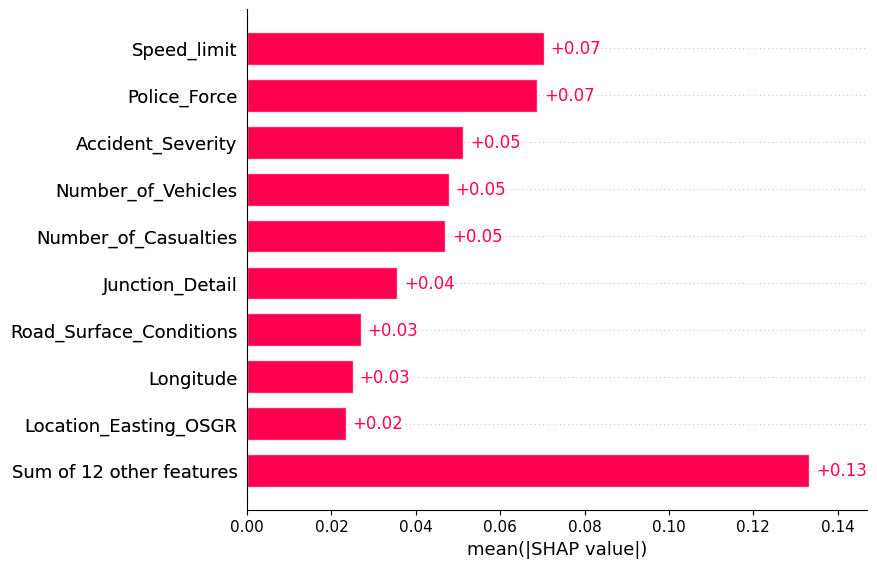

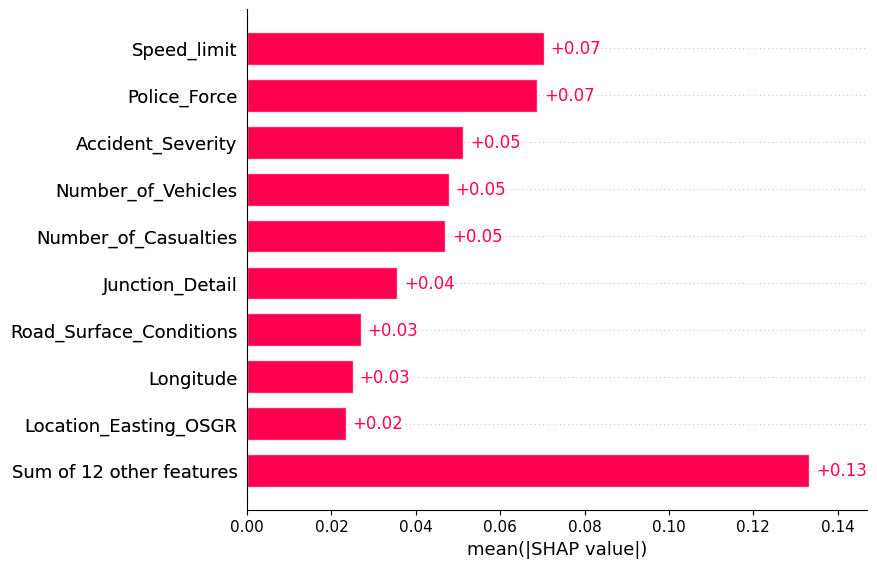

In [115]:
shap.plots.bar(shap_values_pos)
shap.plots.bar(shape_values_neg)

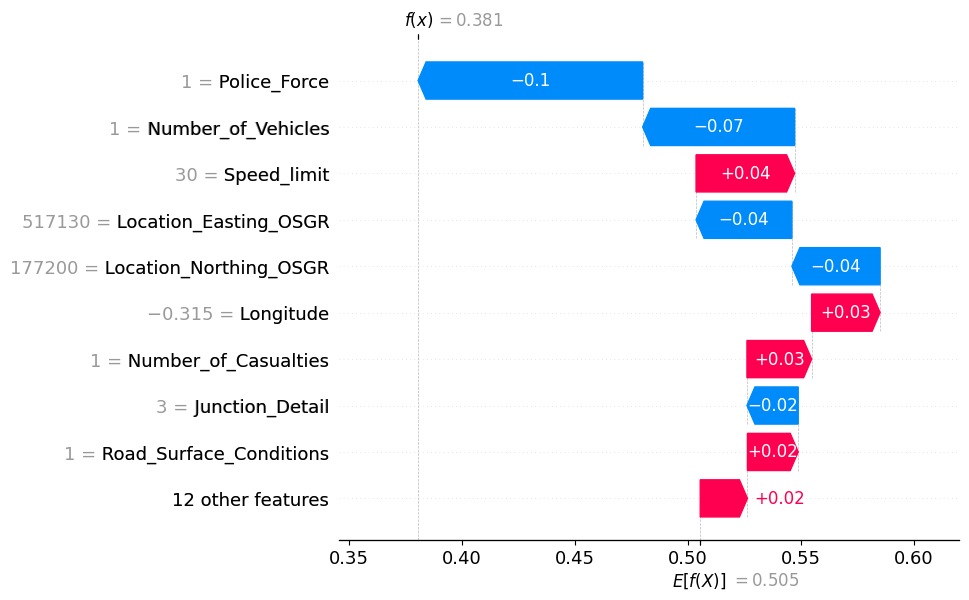

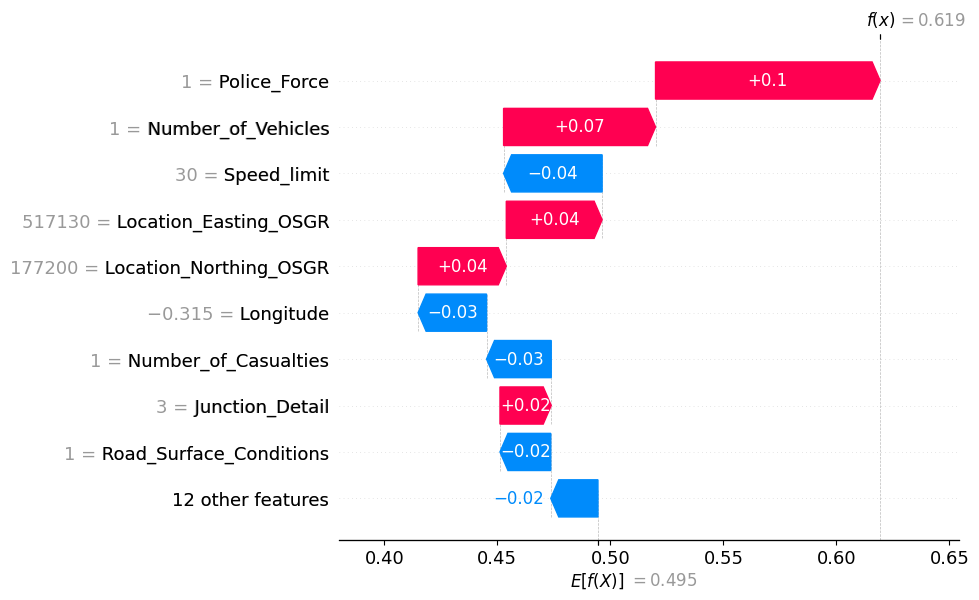

In [116]:
shap.plots.waterfall(shap_values_pos[0])
shap.plots.waterfall(shape_values_neg[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


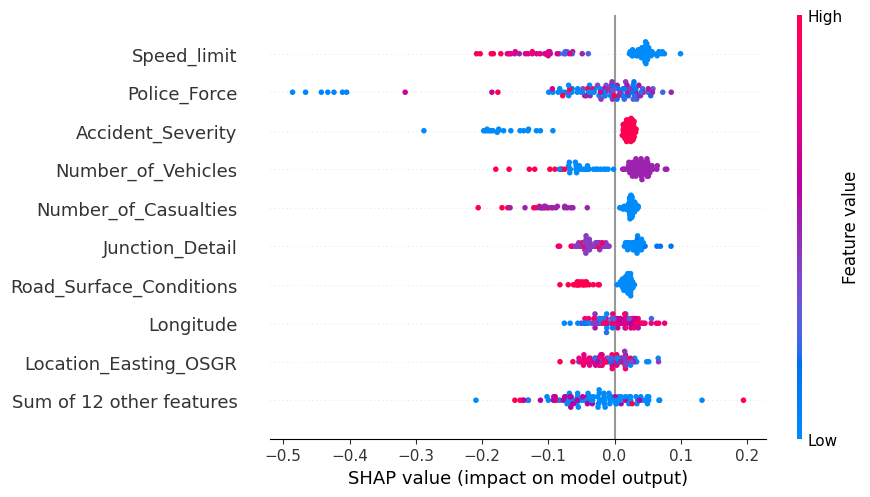

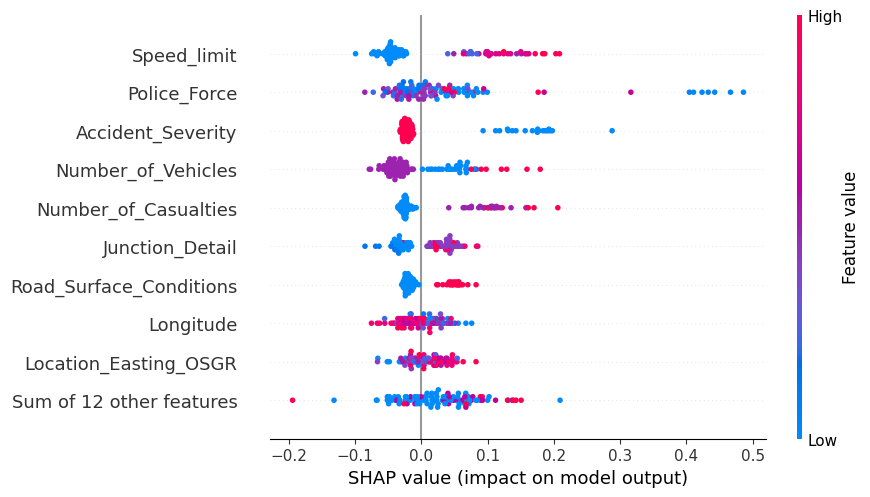

In [117]:
shap.plots.beeswarm(shap_values_pos)
shap.plots.beeswarm(shape_values_neg)